In [ ]:
!pip install control
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 7.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import control as ctl

In [ ]:
# 1) Parâmetros
a1, a2 = 0.02, 0.05
A1, A2 = 0.5, 2.0
g = 9.81
bar_u = 0.5

In [ ]:
# 2) Ponto de equilíbrio
bar_h1 = (bar_u/(a1*np.sqrt(2*g)))**2
bar_h2 = (bar_u/(a2*np.sqrt(2*g)))**2

In [ ]:
# 3) Linearização: constantes auxiliares
c1 = a1*np.sqrt(2*g)
c2 = a2*np.sqrt(2*g)

A = np.array([[-c1/(2*A1*np.sqrt(bar_h1)), 0],[c1/(2*A2*np.sqrt(bar_h1)), -c2/(2*A2*np.sqrt(bar_h2))]])
B = np.array([[1/A1], [0]])
C = np.array([[0, 1]])
D = np.array([[0]])

In [ ]:
# 4) Cria o sistema linearizado e simula degrau
sys_lin = ctl.ss(A, B, C, D)
t = np.linspace(0, 200, 1000)
A_step = 1.0
t, y_lin = ctl.step_response(sys_lin * A_step, T=t)
y_lin = y_lin + bar_h2

In [ ]:
# 5) Simulação do não linear via ODE
def dyn(x, t, u):
    h1, h2 = x
    q1 = a1 * np.sqrt(2*g*h1)
    q2 = a2 * np.sqrt(2*g*h2)
    dh1 = (u - q1)/A1
    dh2 = (q1 - q2)/A2
    return [dh1, dh2]

x0 = [bar_h1, bar_h2]
u = bar_u + A_step

xx = odeint(dyn, x0, t, args=(u,))
y_nl = xx[:,1]

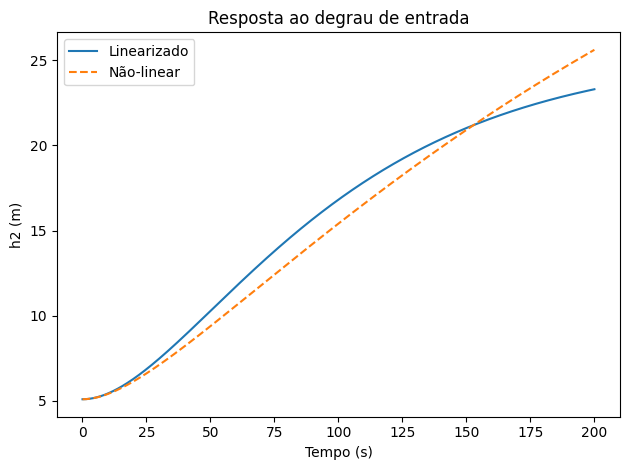

In [ ]:
# 6) Plot comparativo
plt.figure()
plt.plot(t, y_lin, label='Linearizado')
plt.plot(t, y_nl,  label='Não-linear', linestyle='--')
plt.xlabel('Tempo (s)')
plt.ylabel('h2 (m)')
plt.title('Resposta ao degrau de entrada')
plt.legend()
plt.tight_layout()
plt.show()